In [1]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2021-04-23 01:13:10--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.00MB/s    in 41s     

2021-04-23 01:13:52 (7.45 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
import zipfile,os
zipfile_dir = '/tmp/rockpaperscissors.zip'
read_zip = zipfile.ZipFile(zipfile_dir, 'r')
read_zip.extractall('/tmp')
read_zip.close()

In [4]:
os.listdir('/tmp/rockpaperscissors')

['scissors', 'rps-cv-images', 'README_rpc-cv-images.txt', 'paper', 'rock']

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
folder_awal = os.path.join('/tmp/rockpaperscissors/rps-cv-images')
rock = os.path.join(folder_awal, 'rock')
paper = os.path.join(folder_awal, 'paper')
scissor = os.path.join(folder_awal, 'scissors')

In [10]:
print('rock :', len(os.listdir(rock)))
print('paper :', len(os.listdir(paper)))
print('scissors :', len(os.listdir(scissor)))
print('jumlah dataset:', (len(os.listdir(rock)) + len(os.listdir(paper)) + len(os.listdir(scissor))))

rock : 726
paper : 712
scissors : 750
jumlah dataset: 2188


In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
    )

In [13]:
train_data = train_datagen.flow_from_directory(
    folder_awal,
    batch_size=16,
    shuffle=True,
    target_size=(150, 150), 
    subset="training",
    class_mode='categorical')

validation_data = train_datagen.flow_from_directory(
    folder_awal,
    batch_size=16,
    shuffle=True,
    target_size=(150, 150),
    subset="validation",
    class_mode='categorical')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [17]:
import tensorflow as tf

In [18]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92):
      print("\nAkurasi telah mencapai 92%")
      self.model.stop_training = True
callbacks = myCallback()

In [19]:
layer = tf.keras.layers
model = tf.keras.models.Sequential([

    layer.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layer.MaxPooling2D(2, 2),

    layer.Conv2D(64, (3,3), activation='relu'),
    layer.MaxPooling2D(2,2),

    layer.Conv2D(128, (3,3), activation='relu'),
    layer.MaxPooling2D(2,2),

    layer.Conv2D(128, (3,3), activation='relu'),
    layer.MaxPooling2D(2,2),

    layer.Flatten(),
    layer.Dropout(0.2),

    layer.Dense(512, activation='relu'),
    layer.Dense(3, activation='softmax')
])

In [20]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy'])

In [21]:
history = model.fit(
    train_data,
    epochs=40,
    steps_per_epoch=20,
    validation_data = validation_data,
    validation_steps=5,
    callbacks = callbacks)

Epoch 1/40
20/20 [==============================] - 26s 1s/step - loss: 1.4672 - accuracy: 0.3471 - val_loss: 1.1699 - val_accuracy: 0.2250
Epoch 2/40
20/20 [==============================] - 24s 1s/step - loss: 1.1194 - accuracy: 0.3145 - val_loss: 1.0911 - val_accuracy: 0.3625
Epoch 3/40
20/20 [==============================] - 24s 1s/step - loss: 1.0947 - accuracy: 0.3687 - val_loss: 1.5830 - val_accuracy: 0.3625
Epoch 4/40
20/20 [==============================] - 24s 1s/step - loss: 1.2539 - accuracy: 0.4794 - val_loss: 0.9908 - val_accuracy: 0.6000
Epoch 5/40
20/20 [==============================] - 24s 1s/step - loss: 0.8450 - accuracy: 0.6789 - val_loss: 0.9348 - val_accuracy: 0.6375
Epoch 6/40
20/20 [==============================] - 24s 1s/step - loss: 0.6971 - accuracy: 0.7049 - val_loss: 0.6697 - val_accuracy: 0.7000
Epoch 7/40
20/20 [==============================] - 24s 1s/step - loss: 0.7089 - accuracy: 0.7140 - val_loss: 0.4837 - val_accuracy: 0.7625
Epoch 8/40
20/20 [==

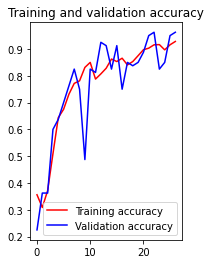

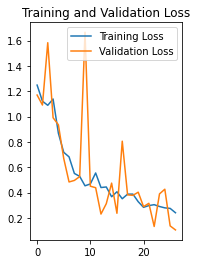

In [22]:
import matplotlib.pyplot as plt
loss = history.history['loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

range_plot = range(len(acc))
plt.subplot(1, 2, 1)
plt.plot(range_plot, acc, 'r', label='Training accuracy')
plt.plot(range_plot, val_acc, 'b', label='Validation accuracy')
plt.legend(loc=0)
plt.title('Training and validation accuracy')
plt.figure()

plt.subplot(1, 2, 2)
plt.plot(range_plot, loss, label='Training Loss')
plt.plot(range_plot, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
saving_path = ("/content/mymodel/") #path penyimpanan model
tf.saved_model.save(model, saving_path)

INFO:tensorflow:Assets written to: /content/mymodel/assets


In [24]:
converter = tf.lite.TFLiteConverter.from_saved_model(saving_path)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

13897564